In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [21]:
df = pd.read_csv('Mall_Customers.csv')


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

In [9]:
df.drop_duplicates()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df.shape

(200, 5)

In [12]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Encoding Data


In [13]:
la = LabelEncoder()
dobdf = df.select_dtypes(include="object")
nobdf = df.select_dtypes(exclude="object")

for i in range(dobdf.shape[1]):
    dobdf.iloc[:, i] = la.fit_transform(dobdf.iloc[:, i])

nreal = pd.concat([dobdf, nobdf], axis=1)

print(nreal.head())

  Gender  CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0      1           1   19                  15                      39
1      1           2   21                  15                      81
2      0           3   20                  16                       6
3      0           4   23                  16                      77
4      0           5   31                  17                      40


# scatter the two coulmn Annual Income (k$)  Spending Score (1-100) to know number of clusres

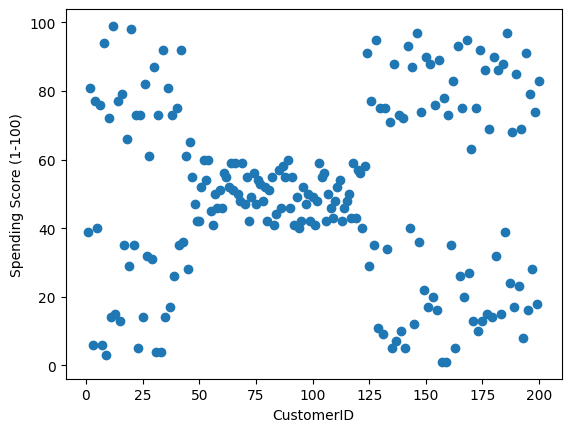

In [14]:
plt.scatter(nreal['CustomerID'], nreal['Spending Score (1-100)'])
plt.xlabel('CustomerID')
plt.ylabel('Spending Score (1-100)')
plt.show()

# cluster data to 5 clusters

In [15]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(nreal[['CustomerID', 'Spending Score (1-100)']])
print(y_predicted)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# calc centroids

In [16]:
nreal['cluster']=y_predicted
print(km.cluster_centers_)

[[164.          17.88888889]
 [ 39.11627907  65.81395349]
 [ 96.05084746  48.84745763]
 [162.          82.12820513]
 [ 23.          20.91304348]]


# plot data with centroids

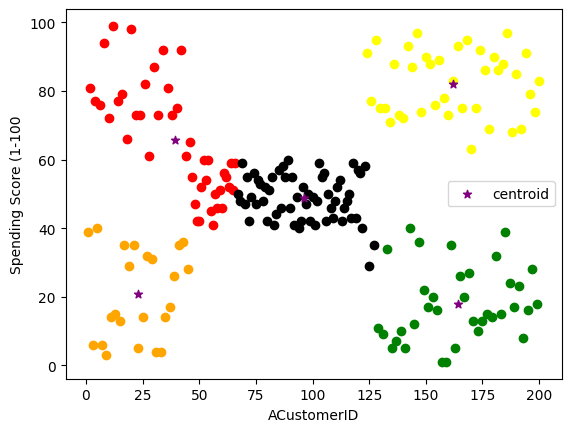

In [17]:
df1 = nreal[nreal.cluster==0]
df2 = nreal[nreal.cluster==1]
df3 = nreal[nreal.cluster==2]
df4 = nreal[nreal.cluster==3]
df5 = nreal[nreal.cluster==4]
plt.scatter(df1.CustomerID,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.CustomerID,df2['Spending Score (1-100)'],color='red')
plt.scatter(df3.CustomerID,df3['Spending Score (1-100)'],color='black')
plt.scatter(df4.CustomerID,df4['Spending Score (1-100)'],color='yellow')
plt.scatter(df5.CustomerID,df5['Spending Score (1-100)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('ACustomerID')
plt.ylabel('Spending Score (1-100')
plt.legend()
plt.show()

# after ploting data with centroids we find some of centers havent calc right so we need to use minmax scaller

  Gender  CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0      1    0.000000   19                  15                0.387755        4
1      1    0.005025   21                  15                0.816327        1
2      0    0.010050   20                  16                0.051020        4
3      0    0.015075   23                  16                0.775510        1
4      0    0.020101   31                  17                0.397959        4


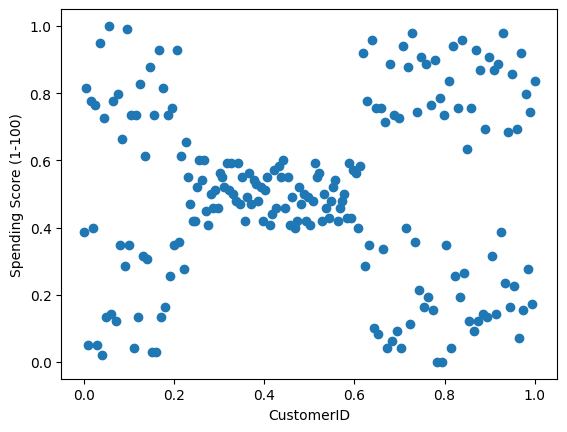

In [18]:
scaler = MinMaxScaler()

scaler.fit(nreal[['Spending Score (1-100)']])
nreal['Spending Score (1-100)'] = scaler.transform(nreal[['Spending Score (1-100)']])

scaler.fit(df[['CustomerID']])
nreal['CustomerID'] = scaler.transform(nreal[['CustomerID']])
print(nreal.head())
plt.scatter(nreal['CustomerID'], nreal['Spending Score (1-100)'])
plt.xlabel('CustomerID')
plt.ylabel('Spending Score (1-100)')
plt.show()

plot data with right centriods after train and fit model with minmax scaller

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
  Gender  CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0      1    0.000000   19                  15                0.387755        3
1      1    0.005025   21                  15                0.816327        4
2      0    0.010050   20                  16                0.051020        3
3      0    0.015075   23                  16                0.775510        4
4      0    0.020101   31                  17                0.397959        3
[[0.80904523 0.82783883]
 [0.42211055 0.49880732]
 [0.80904523 0.17991407]
 [0.11055276 0.20319432]
 [0.11557789 0.7914

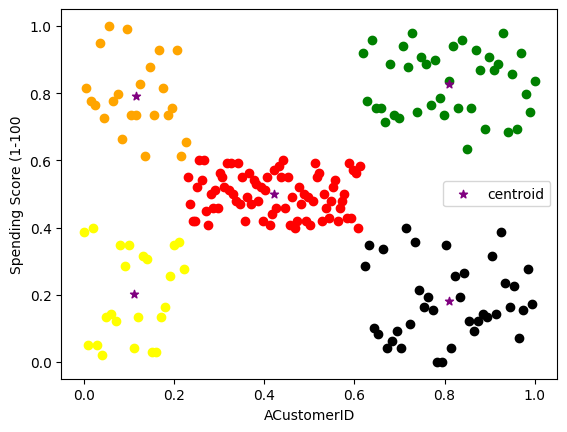

In [19]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(nreal[['CustomerID', 'Spending Score (1-100)']])
print(y_predicted)
nreal['cluster']=y_predicted
print(nreal.head())
print(km.cluster_centers_)
df1 = nreal[nreal.cluster==0]
df2 = nreal[nreal.cluster==1]
df3 = nreal[nreal.cluster==2]
df4 = nreal[nreal.cluster==3]
df5 = nreal[nreal.cluster==4]
plt.scatter(df1.CustomerID,df1['Spending Score (1-100)'],color='green')
plt.scatter(df2.CustomerID,df2['Spending Score (1-100)'],color='red')
plt.scatter(df3.CustomerID,df3['Spending Score (1-100)'],color='black')
plt.scatter(df4.CustomerID,df4['Spending Score (1-100)'],color='yellow')
plt.scatter(df5.CustomerID,df5['Spending Score (1-100)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('ACustomerID')
plt.ylabel('Spending Score (1-100')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

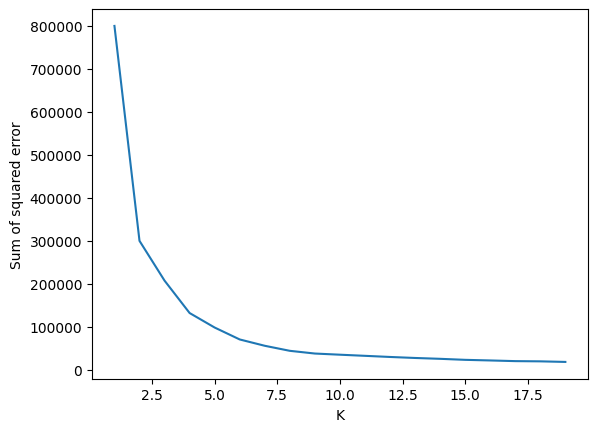

In [20]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['CustomerID','Spending Score (1-100)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

ploting the elbow to show number of clusters